importing the required libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.tri as tri

importing all the required datasets using pandas

In [2]:
attackingDF = pd.read_csv('archive/attacking.csv')
attemptsDF = pd.read_csv('archive/attempts.csv')
keyStatsDF = pd.read_csv('archive/key_stats.csv')
goalsDF = pd.read_csv('archive/goals.csv')


bar chart showing players with the most goals

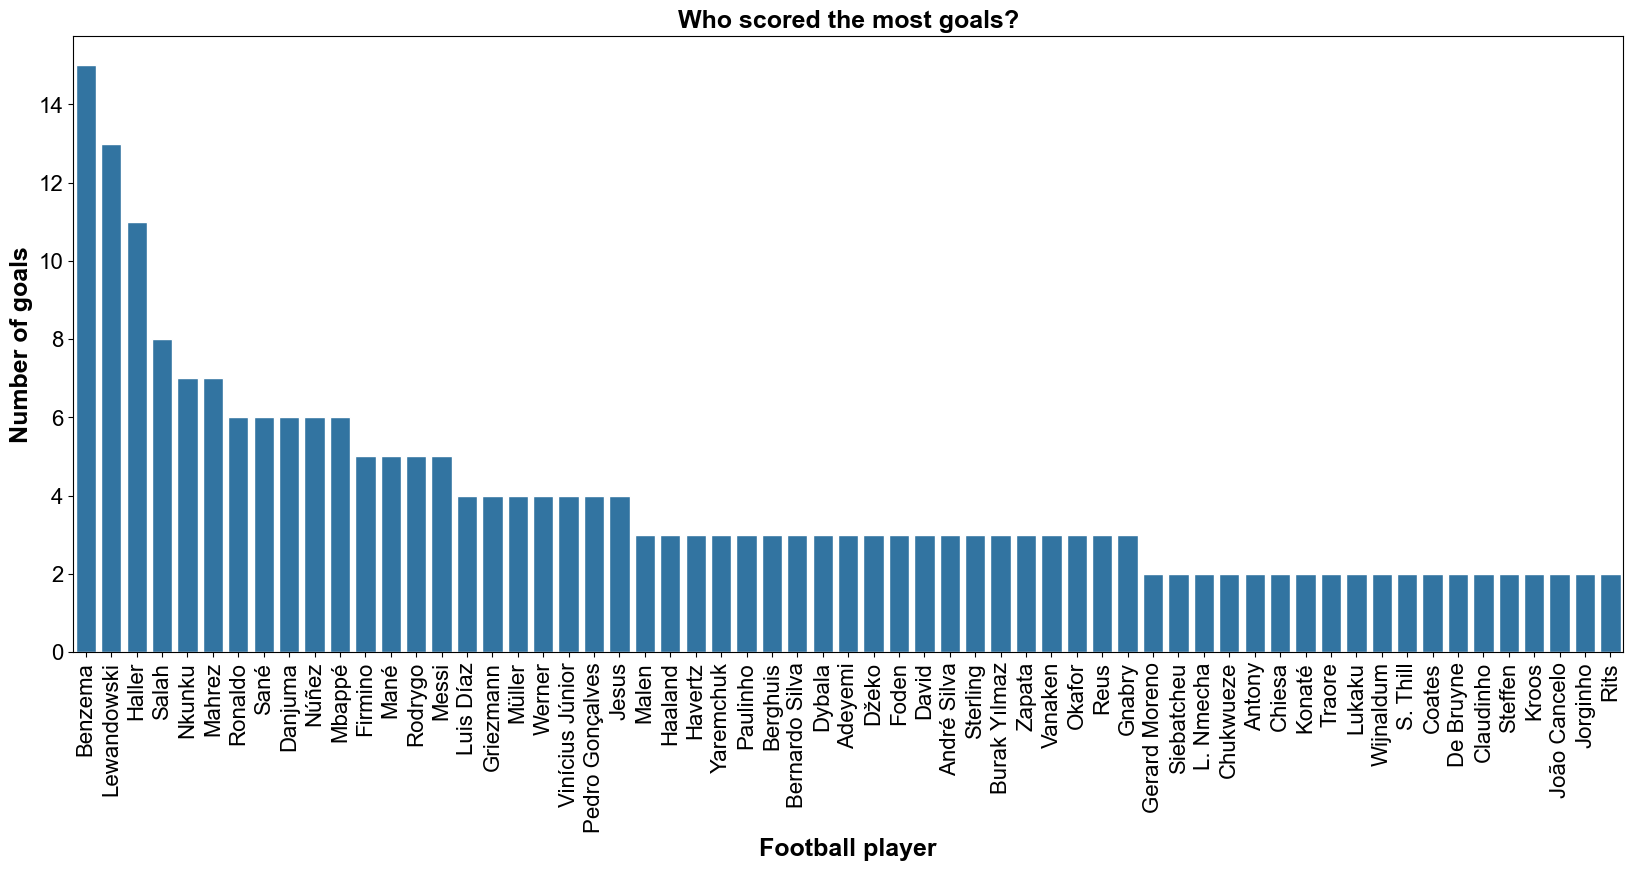

In [3]:
df_players = goalsDF.loc[0:41, ['player_name', 'goals']]

plt.figure(figsize=(20, 8))

plt.title('Who scored the most goals?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)

sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=goalsDF.sort_values('goals', ascending=False)['player_name'][0:61],
            y=goalsDF.sort_values('goals', ascending=False)['goals'][0:61])

plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of goals', fontsize=18, fontweight='bold')
plt.show()

bar graph to show the best dribblers in the league

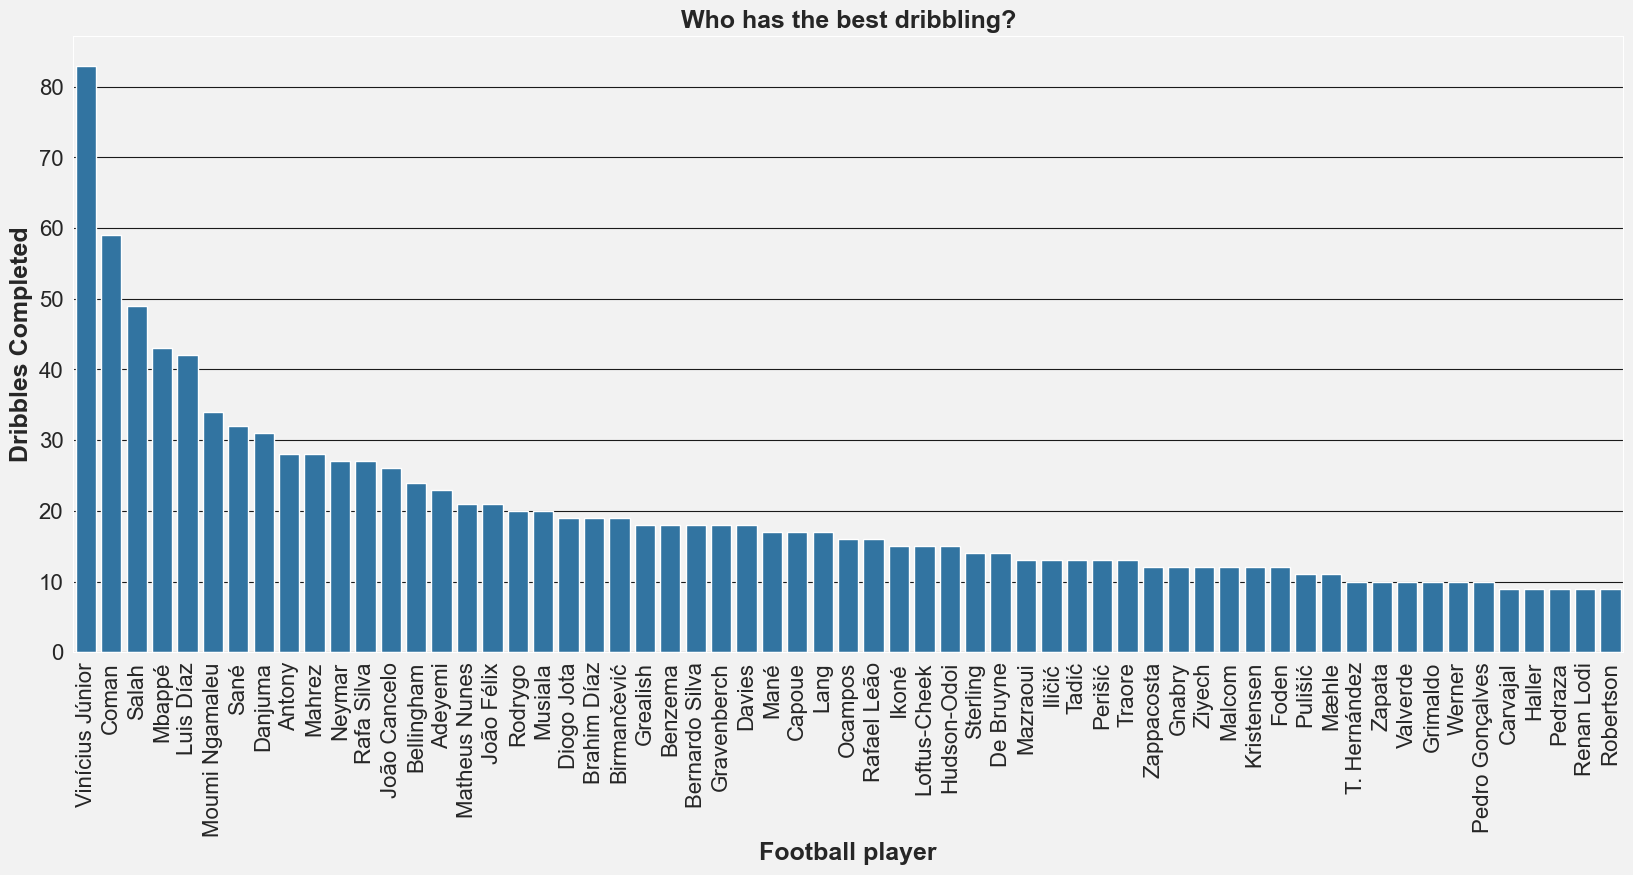

In [4]:
plt.figure(figsize=(20, 8))

plt.title('Who has the best dribbling?', fontsize=18, fontweight='bold')

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=attackingDF.sort_values('dribbles', ascending=False)[0:61]['player_name'],
            y=attackingDF.sort_values('dribbles', ascending=False)[0:61]['dribbles'])

plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Dribbles Completed', fontsize=18, fontweight='bold')

plt.show()

pie chart for attempts on target, off target and blocked

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12


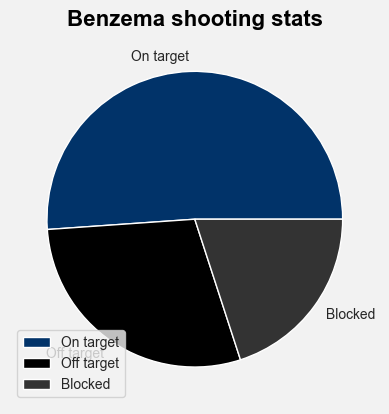

In [5]:
playerName = input("Enter the name of the player")
playerName2 = input("Enter the name of the player")
playerStats = attemptsDF[attemptsDF['player_name'] == playerName]
onTarget = playerStats['on_target'].iloc[0]
offTarget = playerStats['off_target'].iloc[0]
blocked = playerStats['blocked'].iloc[0]
plt.title(playerName+" shooting stats", fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})
plt.pie([onTarget, offTarget, blocked],labels=['On target', 'Off target', 'Blocked'], colors=['#013369','#000000','#333333'])
plt.legend()

playerStats

scatter plot for matches played vs attempts

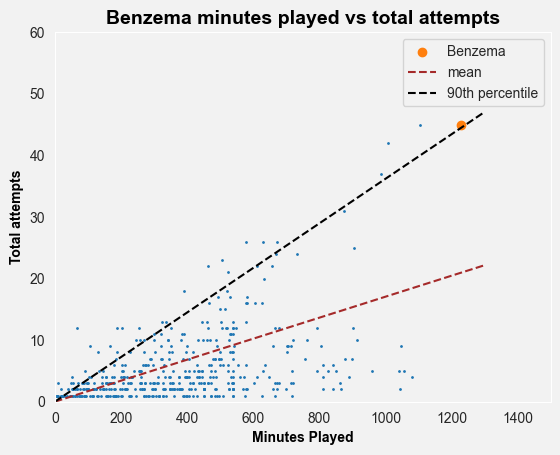

In [6]:
# x and y limits based on the given dataset
plt.ylim(0,60)
plt.xlim(0,1500)


plt.xlabel("Minutes Played", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Total attempts", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})

# merging minutes played and attempts from attemptsDF and keyStatsDF
keyXattempts = pd.merge(attemptsDF, keyStatsDF, on='player_name')

# scatter plot 1 for every player in the league
plt.scatter(keyXattempts['minutes_played'], keyXattempts['total_attempts'],s=1)
minutesPlayed = keyStatsDF['minutes_played'].iloc[0]
totalAttempts = playerStats['total_attempts'].iloc[0]

# scatter plot 2 for given searched player
plt.scatter(minutesPlayed, totalAttempts, label=playerName)
plt.title(playerName+" minutes played vs total attempts", fontdict={'fontname': 'Arial', 'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})




# Mean line
average_y = np.mean(attemptsDF['total_attempts'])
average_x = np.mean(keyStatsDF['minutes_played'])
slope=(average_y)/(average_x)
x_values = np.linspace(0, 1300, 15000) 
y_values = slope*(x_values)
plt.plot(x_values, y_values, color='brown',linestyle='--',label='mean')


# 90th percentile line
percentile90 =np.percentile(attemptsDF['total_attempts'], 90)
slope90 = percentile90/average_x
x_values90 = np.linspace(0, 1300, 15000) 
y_values90 = slope90*(x_values90)
plt.plot(x_values90, y_values90, color='black',linestyle='--',label='90th percentile')

plt.grid(False)

plt.legend()


extracting the top players above the 90th percentile

      player_name  minutes_played  total_attempts
0         Benzema            1106              45
1           Salah            1008              42
2          Mahrez             986              37
3     Lewandowski             876              31
4         Havertz             672              26
5          Antony             577              26
6           Messi             630              26
7         Danjuma             906              25
8          Haller             668              24
9       De Bruyne             734              24
10        Rodrygo             505              23
11        Ronaldo             611              22
12          Foden             658              22
13         Zapata             464              22
14  Gerard Moreno             524              21
15          Coman             632              20
16         Gnabry             391              18
17         Morata             520              18
18         Nkunku             531              17


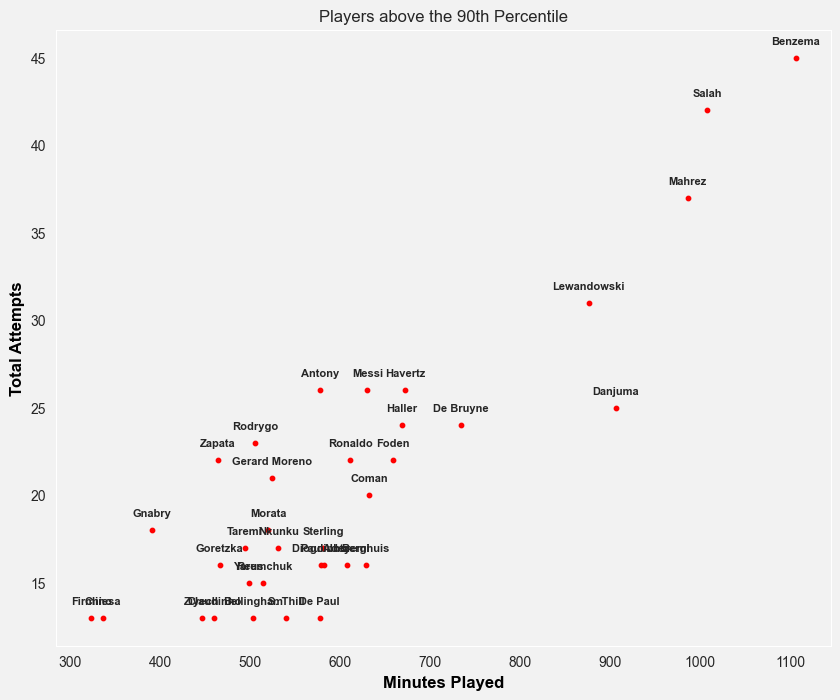

In [7]:
# Setting the figure size
plt.figure(figsize=(10, 8))


plt.xlabel("Minutes Played", fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Total attempts", fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Iterate through keyXattempts and identify players above the 90th percentile line
for index, row in keyXattempts.iterrows():
    minutes_played = row['minutes_played']
    total_attempts = row['total_attempts']

    # Get the player's name from the current row
    player_name = row['player_name']  
    
    # Check if total_attempts is above the 90th percentile
    if total_attempts > percentile90:
        # Plot a dot for the player above the 90th percentile line
        plt.scatter(minutes_played, total_attempts, color='red', label=player_name, s=10) 
        
        # Annotate the player's stats   
        plt.annotate(player_name, (minutes_played, total_attempts), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

        plt.grid(False)

# Filter players above the 90th percentile line
players_above_90th = keyXattempts[keyXattempts['total_attempts'] > percentile90]

# Displaying their names in a DataFrame
players_df = players_above_90th[['player_name', 'minutes_played', 'total_attempts']]
print(players_df)


plt.xlabel("Minutes Played", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Total Attempts", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.title("Players above the 90th Percentile")


plt.show()


conversion rate

,serial_x,player_name,club_x,position_x,total_attempts,on_target,off_target,blocked,match_played_x,serial_y,...,position_y,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played_y
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12,1,...,Forward,15,11,1,3,0,13,2,3,12


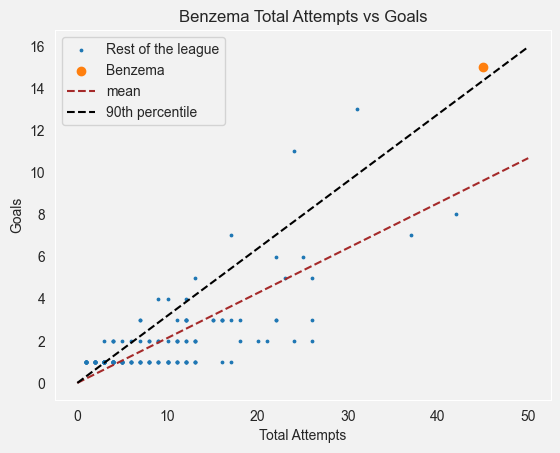

In [8]:
# importing goal stats dataset
goalsDF = pd.read_csv('archive/goals.csv')

# merging the two dataframes values based on the common denomiator (player name)
combined_df = pd.merge(attemptsDF, goalsDF, on='player_name')

# scatter plot for the rest of the league
plt.scatter(combined_df['total_attempts'], combined_df['goals'], s=3, label="Rest of the league")
plt.xlabel('Total Attempts')
plt.ylabel('Goals')
plt.title(playerName+' Total Attempts vs Goals')

# scatter plot for a given player
playerGoal = combined_df[combined_df['player_name'] == playerName]
plt.scatter(playerGoal['total_attempts'],playerGoal['goals'],label=playerName)


# mean line
average_y = np.mean(combined_df['goals'])
average_x = np.mean(combined_df['total_attempts'])
slope=(average_y)/(average_x)
x_values = np.linspace(0, 50, 1000) 
y_values = slope*(x_values)
plt.plot(x_values, y_values, color='brown',linestyle='--',label='mean')

# 90th percentile line
percentile90 =np.percentile(combined_df['goals'], 90)
slope90 = percentile90/average_x
x_values90 = np.linspace(0, 50, 1000) 
y_values90 = slope90*(x_values90)
plt.plot(x_values90, y_values90, color='black',linestyle='--',label='90th percentile')

plt.legend()

plt.grid(False)

combined_df[combined_df['player_name'] == playerName]


radar chart stats for player 1

In [9]:

# Merge the data frames using the 'player_name' column
playerGraphDataDF = pd.merge(attemptsDF[['player_name', 'total_attempts', 'on_target', 'match_played']],
                             attackingDF[['player_name', 'assists', 'dribbles']],
                             on='player_name')
playerGraphDataDF = pd.merge(playerGraphDataDF,
                             goalsDF[['player_name', 'goals']],
                             on='player_name')
playerGraphDataDF = pd.merge(playerGraphDataDF,
                             keyStatsDF[['player_name', 'minutes_played']],
                             on='player_name')


player_row = playerGraphDataDF[playerGraphDataDF['player_name'] == playerName]


# extracting the minutes played and matches played
mp = player_row['match_played']
minp = player_row['minutes_played']

# listing all the stat to be plotted on the graph and storing them in a list
playerGraphStats = [(player_row['total_attempts'])*90/(minp*5), ((player_row['goals']*90))/(minp*2), 
                    player_row['on_target']*90/(minp*4), player_row['dribbles']*90/(minp*2), 
                    player_row['assists']*90/minp]


playerGraphStats

[0    0.732369
 dtype: float64,
 0    0.610307
 dtype: float64,
 0    0.467902
 dtype: float64,
 0    0.732369
 dtype: float64,
 0    0.081374
 dtype: float64]

radar chart stats for player 2

In [10]:
player_row2 = playerGraphDataDF[playerGraphDataDF['player_name'] == playerName2].iloc[0]

mp2 = player_row2['match_played']
minp2 = player_row2['minutes_played']

playerGraphStats2 = [(player_row2['total_attempts'])*90/(minp2*5), ((player_row2['goals']*90))/(minp2*2), 
                    player_row2['on_target']*90/(minp2*4), player_row2['dribbles']*90/(minp2*2), 
                    player_row2['assists']*90/minp2]

playerGraphStats2


[0.636986301369863,
 0.6678082191780822,
 0.488013698630137,
 0.05136986301369863,
 0.3082191780821918]

pentagonal graph with essential stats for a forward player

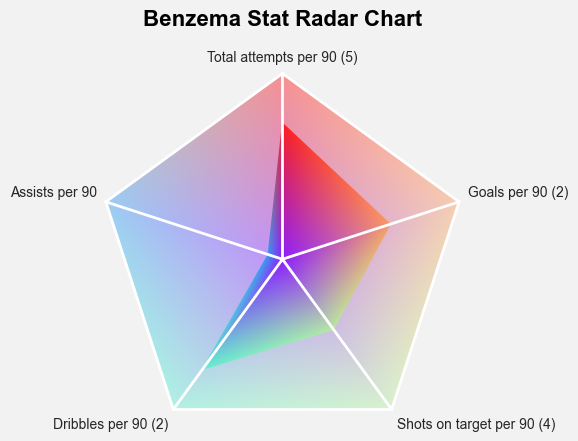

In [11]:

# Data for radar chart
proportions = playerGraphStats
labels = ['Total attempts per 90 (5)', 'Goals per 90 (2)', 
          'Shots on target per 90 (4)', 'Dribbles per 90 (2)', 'Assists per 90']

# Number of variables
N = len(proportions)

# Add a point to close the radar chart
proportions = np.append(proportions, 1)

# Define angles for each axis
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Define coordinates for the outer vertices of the radar chart
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)

# Define triangles for background and foreground
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)

# Define colormap
cmap = plt.cm.rainbow_r  
colors = np.linspace(0, 1, N + 1)

# Plot background and foreground triangles
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)

# Plot triangle edges
plt.triplot(triang_backgr, color='white', lw=2)

# Add labels for each axis
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')

# Turn off axis
plt.axis('off')

# Set aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set title
plt.title(playerName + ' Stat Radar Chart\n', fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Show the plot
plt.show()

pentagonal graph comparing two forward players

In [12]:
# Assuming playerGraphStats1 and playerGraphStats2 are defined

proportions1 = playerGraphStats
proportions2 = playerGraphStats2

# Remove a label to match the length of proportions
labels = ['Total attempts per 90 (5)', 'goals per 90 (2)', 
          'shots on target per 90 (4)', 'dribbles per 90 (2)', 'assists per 90']

# Define player statistics as strings
stats1 = [f'{label}: {value:.2f}' for label, value in zip(labels, proportions1)]
stats2 = [f'{label}: {value:.2f}' for label, value in zip(labels, proportions2)]

# Join the statistics into a single string with line breaks
stats_str1 = '\n'.join(stats1)
stats_str2 = '\n'.join(stats2)

N = len(labels)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.sin(theta)
y = np.cos(theta)

# Append the first vertex to the end to close the polygon
x = np.append(x, x[0])
y = np.append(y, y[0])

# Plotting the filled background pentagon with 5 equilateral triangles
for i in range(N):
    plt.plot([x[i], x[(i+1)%N]], [y[i], y[(i+1)%N]], color='lightgray', lw=2)

# Plotting the first player's statistics
plt.plot(x * np.append(proportions1, proportions1[0]), y * np.append(proportions1, proportions1[0]), color='blue', lw=2, label=playerName)

# Plotting the second player's statistics
plt.plot(x * np.append(proportions2, proportions2[0]), y * np.append(proportions2, proportions2[0]), color='red', lw=2, label=playerName2)

# Adding labels to the vertices
for label, xi, yi in zip(labels, x[:-1], y[:-1]):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')

# Adding legend and placing it on the extreme right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Setting plot properties
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(playerName +' vs '+playerName2+'\n', fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Adding a text box with player statistics
plt.text(1.05, 0.5, stats_str1, bbox=dict(facecolor='lightblue', alpha=0.5), fontsize=8, verticalalignment='center')
plt.text(1.05, -0.5, stats_str2, bbox=dict(facecolor='lightcoral', alpha=0.5), fontsize=8, verticalalignment='center')

plt.show()


TypeError: unsupported format string passed to Series.__format__